# Module 2: Data transform
## Data: discoveries, Boston

In [9]:
import numpy as np
import os.path as osp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

discoveries = np.array([5, 3, 0, 2, 0, 3, 2, 3, 6, 1, 2, 1, 2, 1, 3, 3, 3, 5, 2, 4,
                        4, 0, 2, 3, 7, 12, 3, 10, 9, 2, 3, 7, 7, 2, 3, 3, 6, 2, 4, 3,
                        5, 2, 2, 4, 0, 4, 2, 5, 2, 3, 3, 6, 5, 8, 3, 6, 6, 0, 5, 2,
                        2, 2, 6, 3, 4, 4, 2, 2, 4, 7, 5, 3, 3, 0, 2, 2, 2, 1, 3, 4,
                        2, 2, 1, 1, 1, 2, 1, 4, 4, 3, 2, 1, 4, 1, 1, 1, 0, 0, 2, 0])

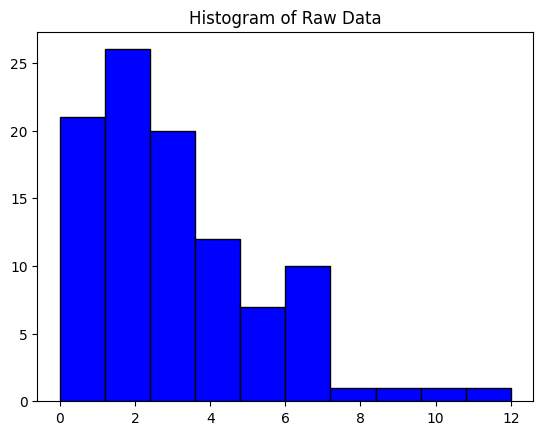

In [10]:
# Histogram of the raw data
plt.hist(discoveries, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Raw Data")
plt.show()

In [15]:
# show the log transform
np.log(discoveries)

<ipython-input-15-d130e68cd1ed>:2: RuntimeWarning: divide by zero encountered in log
  np.log(discoveries)


array([1.60943791, 1.09861229,       -inf, 0.69314718,       -inf,
       1.09861229, 0.69314718, 1.09861229, 1.79175947, 0.        ,
       0.69314718, 0.        , 0.69314718, 0.        , 1.09861229,
       1.09861229, 1.09861229, 1.60943791, 0.69314718, 1.38629436,
       1.38629436,       -inf, 0.69314718, 1.09861229, 1.94591015,
       2.48490665, 1.09861229, 2.30258509, 2.19722458, 0.69314718,
       1.09861229, 1.94591015, 1.94591015, 0.69314718, 1.09861229,
       1.09861229, 1.79175947, 0.69314718, 1.38629436, 1.09861229,
       1.60943791, 0.69314718, 0.69314718, 1.38629436,       -inf,
       1.38629436, 0.69314718, 1.60943791, 0.69314718, 1.09861229,
       1.09861229, 1.79175947, 1.60943791, 2.07944154, 1.09861229,
       1.79175947, 1.79175947,       -inf, 1.60943791, 0.69314718,
       0.69314718, 0.69314718, 1.79175947, 1.09861229, 1.38629436,
       1.38629436, 0.69314718, 0.69314718, 1.38629436, 1.94591015,
       1.60943791, 1.09861229, 1.09861229,       -inf, 0.69314

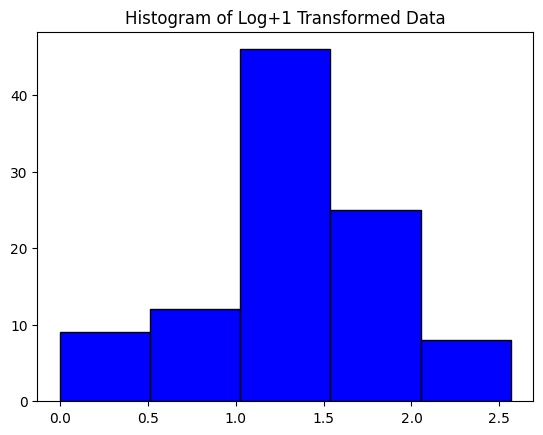

In [16]:
# Histogram of the log+1-transformed data
plt.hist(np.log(discoveries + 1), bins=5, color='blue', edgecolor='black')
plt.title("Histogram of Log+1 Transformed Data")
plt.show()

A better way to check normality is qq-plot

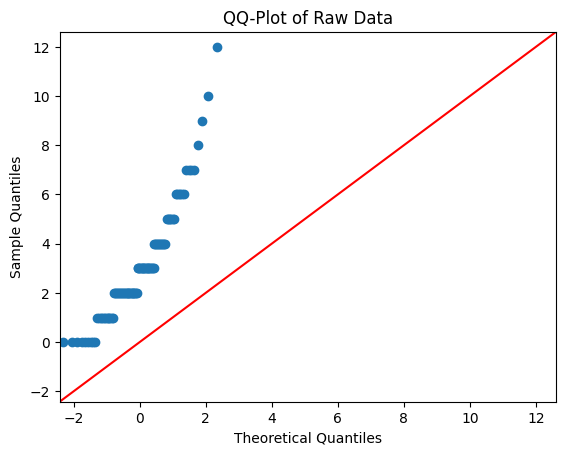

In [17]:
# QQ-plot of raw data
sm.qqplot(discoveries, line='45')
plt.title("QQ-Plot of Raw Data")
plt.show()

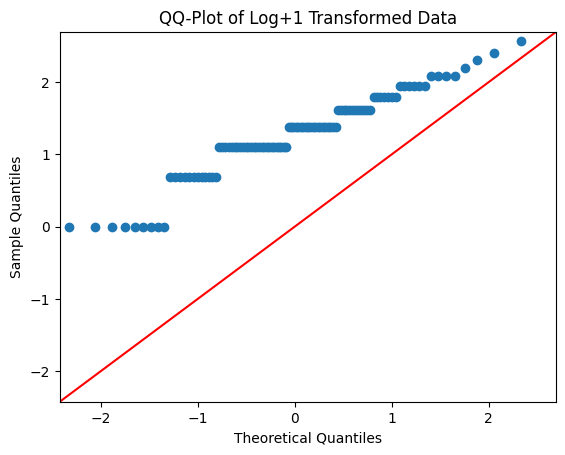

In [18]:
# QQ-plot of the log+1-transformed data
sm.qqplot(np.log(discoveries + 1), line='45')
plt.title("QQ-Plot of Log+1 Transformed Data")
plt.show()

log transform makes the data comply to the normal distribution requirement

# Module 3: Categorical predictors (ANOVA)
## Data: ANOVAExample1.rda

In [20]:
!pip install pyreadr
import pyreadr

# Reading an RDA file
data = pyreadr.read_r('ANOVAExample1.rda')

# Extract the DataFrame from the OrderedDict
data = data['Example1_data']
print(data)

    perchange treatment
0         2.0   NoPromo
1         6.0   NoPromo
2        -4.0   NoPromo
3        11.0        TV
4         4.0        TV
5         9.0        TV
6        -1.0        TV
7         5.0     Price
8        -2.0     Price
9         7.0     Price
10        3.0     Price


In [21]:
import statsmodels.formula.api as smf

# Linear regression
model = smf.ols(formula="perchange ~ treatment", data=data)
result = model.fit()
# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              perchange   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.7549
Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.501
Time:                        14:31:51   Log-Likelihood:                -31.047
No. Observations:                  11   AIC:                             68.09
Df Residuals:                       8   BIC:                             69.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3333      2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


# Module 4: Regularizations (LASSO and ridge)
## Data: Diamond

In [ ]:
# Module 4: Regularizations (LASSO and Ridge)
# Data: Diamond
#============================================================
# This notebook demonstrates how to apply LASSO and Ridge regression on the Diamond dataset.
# We will go through the following steps:
# 1. Import necessary libraries
# 2. Load and preprocess the data
# 3. Train LASSO regression model
# 4. Train Ridge regression model
# 5. Compare models and export predictions


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import patsy


In [69]:
# Step 1: Load the Diamond data
# Use your file path to load the CSV file

# Load the Diamond data
diamond_data = pd.read_csv('diamond.csv')

# Display the first few rows of the dataset
diamond_data.head()


,ID,Carat,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [70]:
# Log-transform the target variable
diamond_data['log_Price'] = np.log(diamond_data['Price'])

In [130]:
# Split the data into training and testing sets
np.random.seed(5)
train_data, test_data = train_test_split(diamond_data, test_size=0.25, stratify=diamond_data['Clarity']) # stratify ensures the training and testing data is consistent in terms of the variable Clarity

# Display the first few rows of the training data
train_data.head()


,ID,Carat,Cut,Color,Clarity,Polish,Symmetry,Report,Price,log_Price
5409,5410,2.00,Very Good,G,SI1,EX,G,GIA,18683,9.835369
43,44,2.12,Ideal,F,VS1,EX,EX,GIA,33667,10.424273
1672,1673,1.20,Very Good,I,SI1,EX,EX,GIA,5955,8.691986
4730,4731,2.06,Signature-Ideal,I,IF,ID,ID,AGSL,25354,10.140692
3168,3169,1.03,Ideal,F,SI1,VG,VG,GIA,5356,8.585973


In [131]:

# Define the formula for creating features
formula = ('log_Price ~ Carat + sqrt(Carat) + Color +Clarity + Cut + Color:Cut + Polish + Symmetry + Report')

# Create design matrices
y_train, X_train = patsy.dmatrices(formula, train_data, return_type='dataframe')
y_test,  X_test =  patsy.dmatrices(formula, test_data, return_type='dataframe')

# Display the first few rows of the training design matrix
X_train


,Intercept,Color[T.E],Color[T.F],Color[T.G],Color[T.H],Color[T.I],Clarity[T.IF],Clarity[T.SI1],Clarity[T.VS1],Clarity[T.VS2],...,Color[T.G]:Cut[T.Signature-Ideal],Color[T.H]:Cut[T.Signature-Ideal],Color[T.I]:Cut[T.Signature-Ideal],Color[T.E]:Cut[T.Very Good],Color[T.F]:Cut[T.Very Good],Color[T.G]:Cut[T.Very Good],Color[T.H]:Cut[T.Very Good],Color[T.I]:Cut[T.Very Good],Carat,sqrt(Carat)
5409,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.00,1.414214
43,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.12,1.456022
1672,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.20,1.095445
4730,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.06,1.435270
3168,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.03,1.014889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.10,1.048809
5636,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,1.417745
2034,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.02,1.421267
5575,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.91,0.953939


In [134]:
# Step 4: LASSO Regression (alpha=1)
# Create and fit the LASSO regression model

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train['log_Price'].values.ravel())


# Make predictions on the testing data
lasso_predictions = lasso_model.predict(X_test)

# Calculate and display MSE and MAPE for LASSO
lasso_mse = mean_squared_error(test_data['Price'], lasso_predictions)
lasso_mape = mean_absolute_percentage_error(test_data['Price'], lasso_predictions) * 100

print(f'LASSO Testing MSE: {lasso_mse}')
print(f'LASSO Testing MAPE: {lasso_mape}')


LASSO Testing MSE: 250182543.40060145
LASSO Testing MAPE: 99.87560671259355


In [136]:
# Create and fit the Lasso regression model with cross-validation
lasso_cv_model = LassoCV(cv=10, random_state=0) # LassoCV works well for high-dimensional datasets with many collinear features
lasso_cv_model.fit(X_train, y_train.values.ravel())

# Get the best alpha
best_alpha = lasso_cv_model.alpha_
print(f'Best alpha: {best_alpha}')



Best alpha: 0.0003110101384452088


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.944e-01, tolerance: 2.275e-01
  model = cd_fast.enet_coordinate_descent(


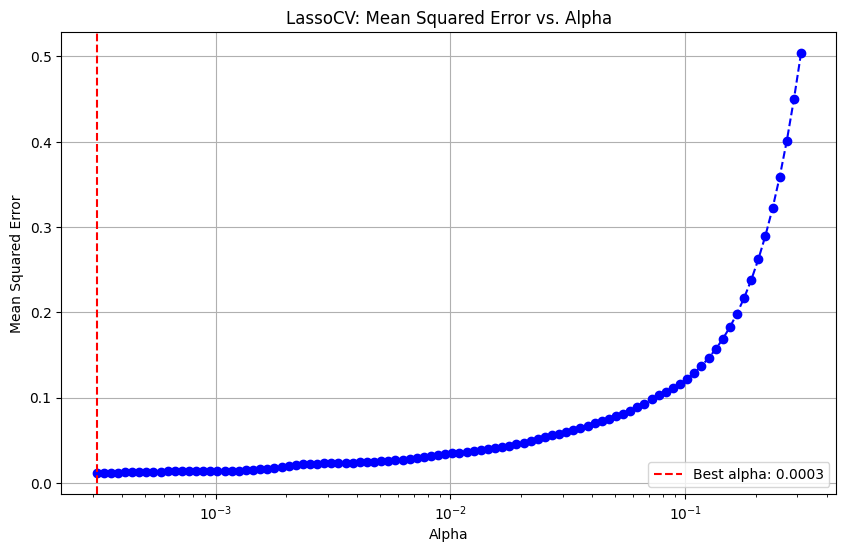

In [141]:
mse_path = lasso_cv_model.mse_path_.mean(axis=1)
alphas = lasso_cv_model.alphas_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, marker='o', linestyle='--', color='b')
plt.axvline(x=best_alpha, linestyle='--', color='r', label=f'Best alpha: {best_alpha:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV: Mean Squared Error vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e-01, tolerance: 2.275e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.898e-01, tolerance: 2.275e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e-01, tolerance: 2.275e

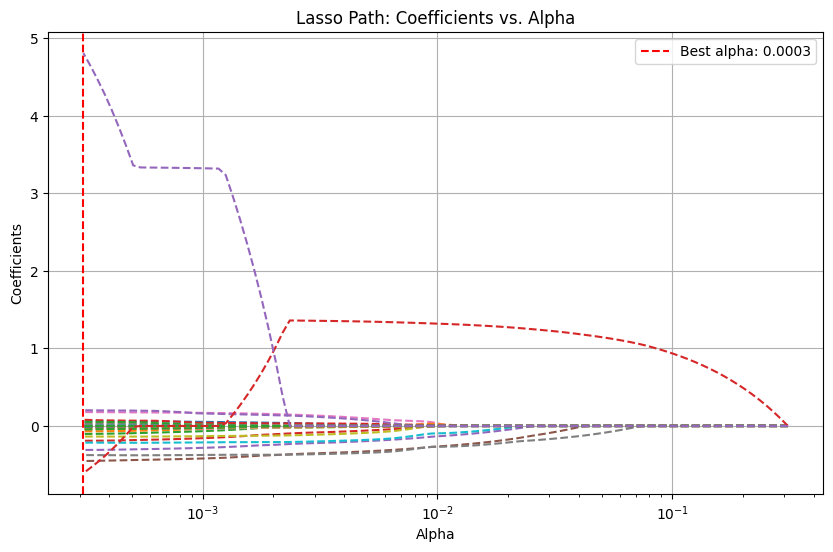

In [146]:
# Plot how the regression coefficients change with respect to alpha for Lasso

coefs = []
for alpha in lasso_cv_model.alphas_:
    lasso_temp = Lasso(alpha=alpha)
    lasso_temp.fit(X_train, y_train.values.ravel())
    coefs.append(lasso_temp.coef_)

coefs = np.array(coefs)  # Convert list of arrays to a 2D numpy array

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv_model.alphas_, coefs, linestyle='--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Path: Coefficients vs. Alpha')
plt.xscale('log')
plt.axvline(x=best_alpha, linestyle='--', color='r', label=f'Best alpha: {best_alpha:.4f}')
plt.legend()
plt.grid(True)
plt.show()